# Crypto Currency Data


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import os

#collecting csv within the directory

data_collector = os.listdir()[1:]
data_collector
ls_crypto = {} #creating dictionary for all altcoins
for name in data_collector:
    s = name.split('_')
    del s[0] #gets rid of coin
    s = ''.join(s)
    s = s.split('.')
    del s[-1] #gets rid of .csv and keeps the name
    s = ''.join(s)
    ls_crypto[s] = name # create dictionary for items

if not os.path.isdir('Graphs'):
    os.mkdir('Graphs/')

# need to create a class and fucntions to automate this
        
def graph_crypto_data(crypto_name, data, spxargs = None, data2 = None): #function for all altcoins
    df = pd.read_csv(data)
    if data2: #If multiple data frames
        df2 = pd.read_csv(data2)
        df = df.fillna(df2) # fill na with another dataset for the same coin. This is to ensure sufficeint data
    if 'Close/Last' in df:
        df['Close'] = df['Close/Last'] #work around for lack of close index error
        
    df['avg'] = df[['High','Low','Open','Close']].mean(axis = 1)
    
    if len(df['Date'].iloc[0].split()) == 1:
        try:
            date = [dt.strptime(d, '%Y-%m-%d') for d in df['Date']] #special case for mutltiple data frame conflicts
        except ValueError:
            date = [dt.strptime(d, '%m/%d/%Y') for d in df['Date']] #Fixes other date time problems
            
    else:
        date = [dt.strptime(d, '%Y-%m-%d %H:%M:%S') for d in df['Date']]

    formatter = mdates.AutoDateFormatter("%m-%Y") ### formatter of the date
    locator = mdates.AutoDateLocator() ### where to put the labels
        
    ax = plt.gca()
    ax.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
    ax.xaxis.set_major_locator(locator) ## calling the locator for the x-axis
    if spxargs:
        ax.tick_params(axis='x', rotation=spxargs) # Rotate them to make them prittier
    plt.plot(date,df['avg'])
    plt.title(crypto_name + ' Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.savefig('Graphs/' + crypto_name + '.png') #save to directory
    return plt.show();


In [3]:
del ls_crypto['']
del ls_crypto['dataframes']
#del ls_crypto['BTC']
#del ls_crypto['ETH']
ls_crypto

{'Aave': 'coin_Aave.csv',
 'BinanceCoin': 'coin_BinanceCoin.csv',
 'Bitcoin': 'coin_Bitcoin.csv',
 'Cardano': 'coin_Cardano.csv',
 'ChainLink': 'coin_ChainLink.csv',
 'Cosmos': 'coin_Cosmos.csv',
 'CryptocomCoin': 'coin_CryptocomCoin.csv',
 'Dogecoin': 'coin_Dogecoin.csv',
 'EOS': 'coin_EOS.csv',
 'Ethereum': 'coin_Ethereum.csv',
 'Iota': 'coin_Iota.csv',
 'Litecoin': 'coin_Litecoin.csv',
 'Monero': 'coin_Monero.csv',
 'NEM': 'coin_NEM.csv',
 'Polkadot': 'coin_Polkadot.csv',
 'Solana': 'coin_Solana.csv',
 'Stellar': 'coin_Stellar.csv',
 'Tether': 'coin_Tether.csv',
 'Tron': 'coin_Tron.csv',
 'Uniswap': 'coin_Uniswap.csv',
 'USDCoin': 'coin_USDCoin.csv',
 'WrappedBitcoin': 'coin_WrappedBitcoin.csv',
 'XRP': 'coin_XRP.csv',
 'BTC': 'HistoricalData_BTC.csv',
 'ETH': 'HistoricalData_ETH.csv'}

## Bitcoin

 - The digital coin that started the entire cryptocurrncy ecosystem

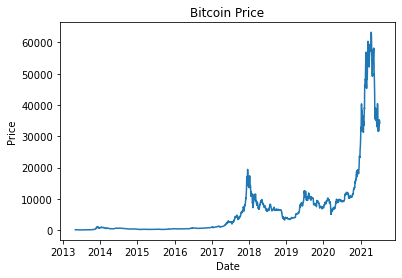

In [4]:
btc = graph_crypto_data('Bitcoin', 'coin_Bitcoin.csv')
btc

## Ethereum

 - The crypto currency that is often the home to all kinds of alt coin

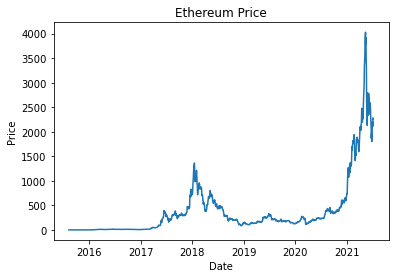

In [36]:
#Ethereum Datframe
eth = graph_crypto_data('Ethereum', 'coin_Ethereum.csv')
eth

## Solana

 - A layer 2 (built on top of ethereum) Defi alt coin designed to perform fast transactions at low costs
 - Defi stands for Decentralized finance.
     - An enviorment where the banks and the goverment can't touch your money. Only you can touch your money

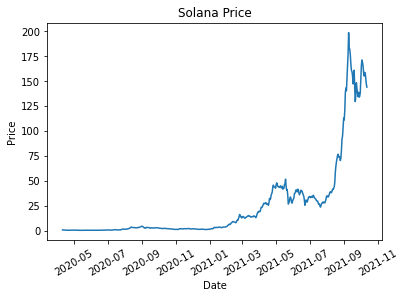

In [5]:
#Solana Dataframe
sol = graph_crypto_data('Solana','SOL1-USD.csv',30,'coin_Solana.csv')
sol

## Alt Coin

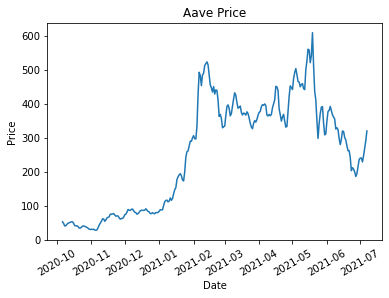

None


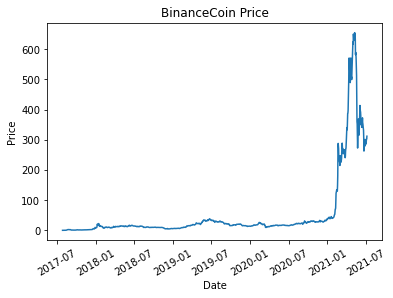

None


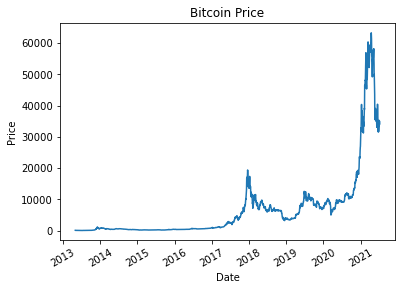

None


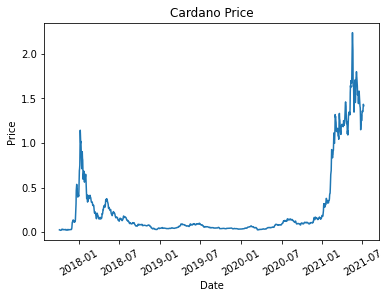

None


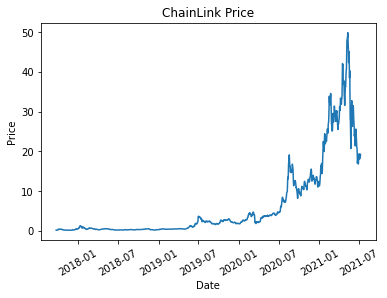

None


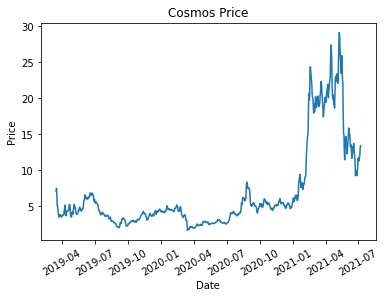

None


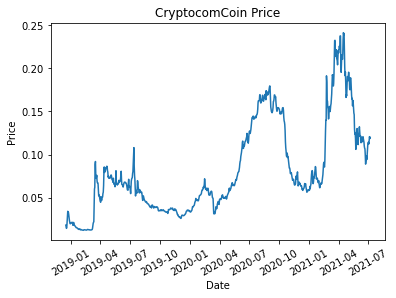

None


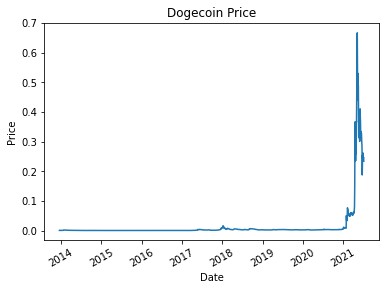

None


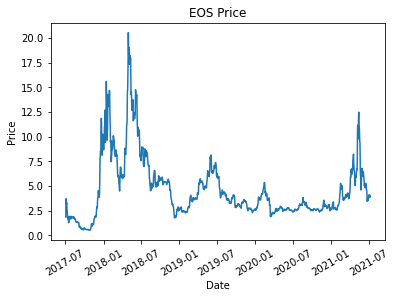

None


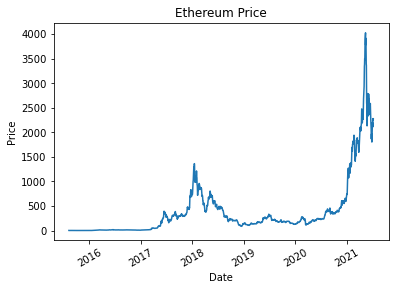

None


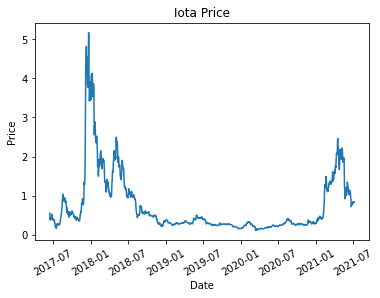

None


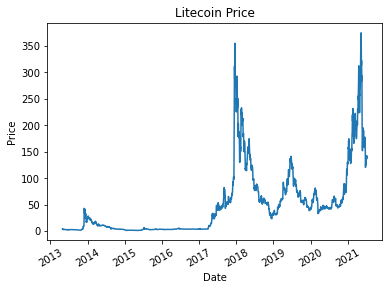

None


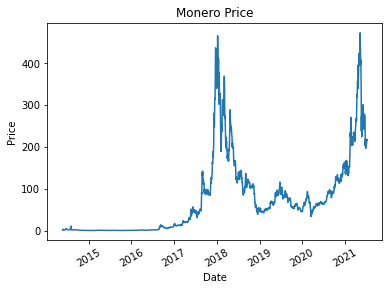

None


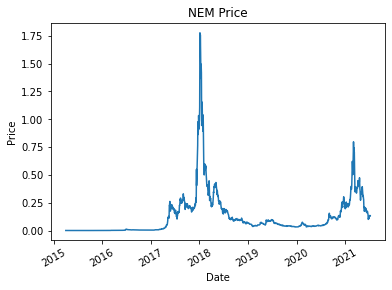

None


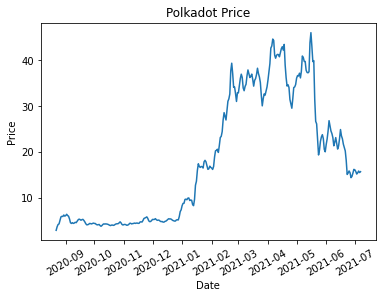

None


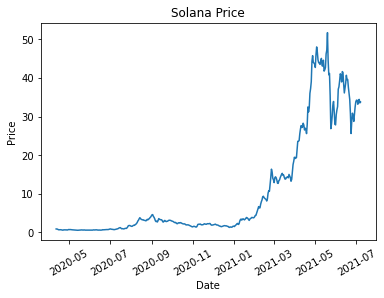

None


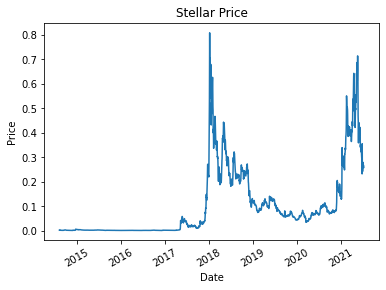

None


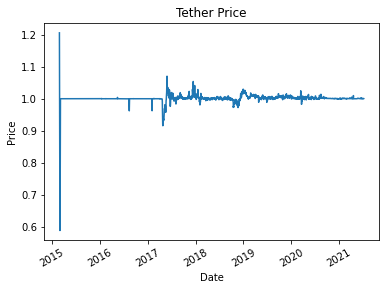

None


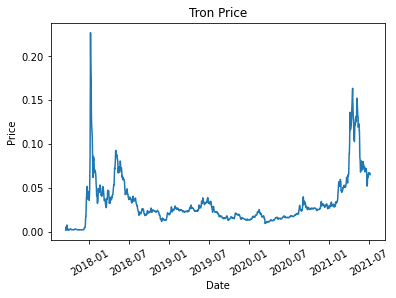

None


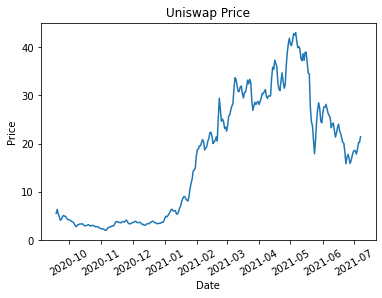

None


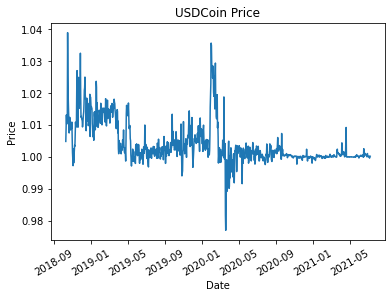

None


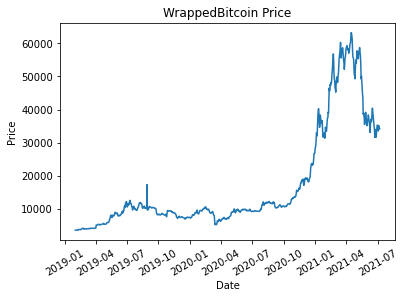

None


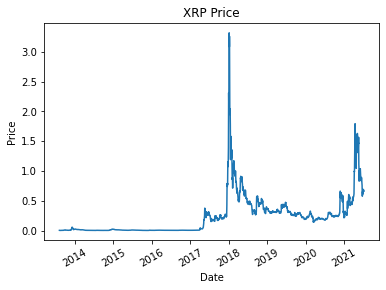

None


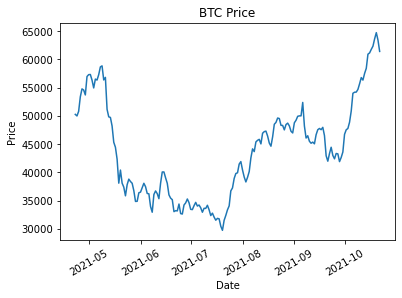

None


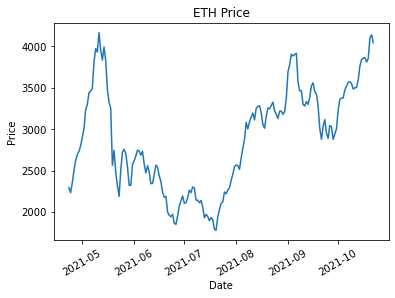

None


In [38]:
for k, v in ls_crypto.items():
    print(graph_crypto_data(k, v,30))